In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import torch
from torch import nn
from sklearn.metrics import accuracy_score


In [2]:
N = 5
matrix = np.random.choice([0, 1], size=(N, N))
np.savetxt('random_matrix.txt', matrix, fmt='%d')

In [3]:
def create_gif(path, name, dest_name, num_ele):
    fig, ax = plt.subplots()
    #plt.subplots_adjust(top=0.85)

    # Initialize your data
    frame = np.loadtxt(path + str(0) + name)

    # Show the initial image
    im = ax.imshow(frame, cmap='gray')

    # Animation function
    def animate(i):
        frame = np.loadtxt(path + str(i) + name)
        im.set_array(frame)
        ax.set_title(f'Frame {i}')
        return [im]

    # Create animation
    ani = animation.FuncAnimation(
        fig, animate, frames=range(num_ele), interval=200, blit=True)

    ani.save(dest_name)

In [4]:
def create_double_gif(path1, name1, path2, name2, dest_name, num_ele):
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # Adjust size here

    frame1 = np.loadtxt(path1 + str(0) + name1)
    frame2 = np.loadtxt(path2 + str(0) + name2)

    # Show the initial image
    im1 = axs[0].imshow(frame1, cmap='gray')
    im2 = axs[1].imshow(frame2, cmap='gray')

    # Animation function
    def animate(i):
        frame1 = np.loadtxt(path1 + str(i) + name1)
        frame2 = np.loadtxt(path2 + str(i) + name2)
        im1.set_array(frame1)
        im2.set_array(frame2)
        axs[0].set_title(f'Frame {i} for Plot 1')
        axs[1].set_title(f'Frame {i} for Plot 2')
        return [im1, im2]

    # Create animation
    ani = animation.FuncAnimation(
        fig, animate, frames=range(num_ele), interval=200, blit=True)

    ani.save(dest_name)

In [ ]:
create_gif('./video_1/frames_DVS/','_frame_DVS.txt', 'all.gif', 51)
create_gif('./video_1/test_prediction/','_test_prediction.txt', 'test_prediction.gif', 25)
create_gif('./video_1/test_target/','_test_target.txt', 'test_target.gif', 25)
create_gif('./video_1/train_prediction/','_train_prediction.txt', 'train_prediction.gif', 25)
create_gif('./video_1/train_target/','_train_target.txt', 'train_target.gif', 25)

MovieWriter ffmpeg unavailable; using Pillow instead.


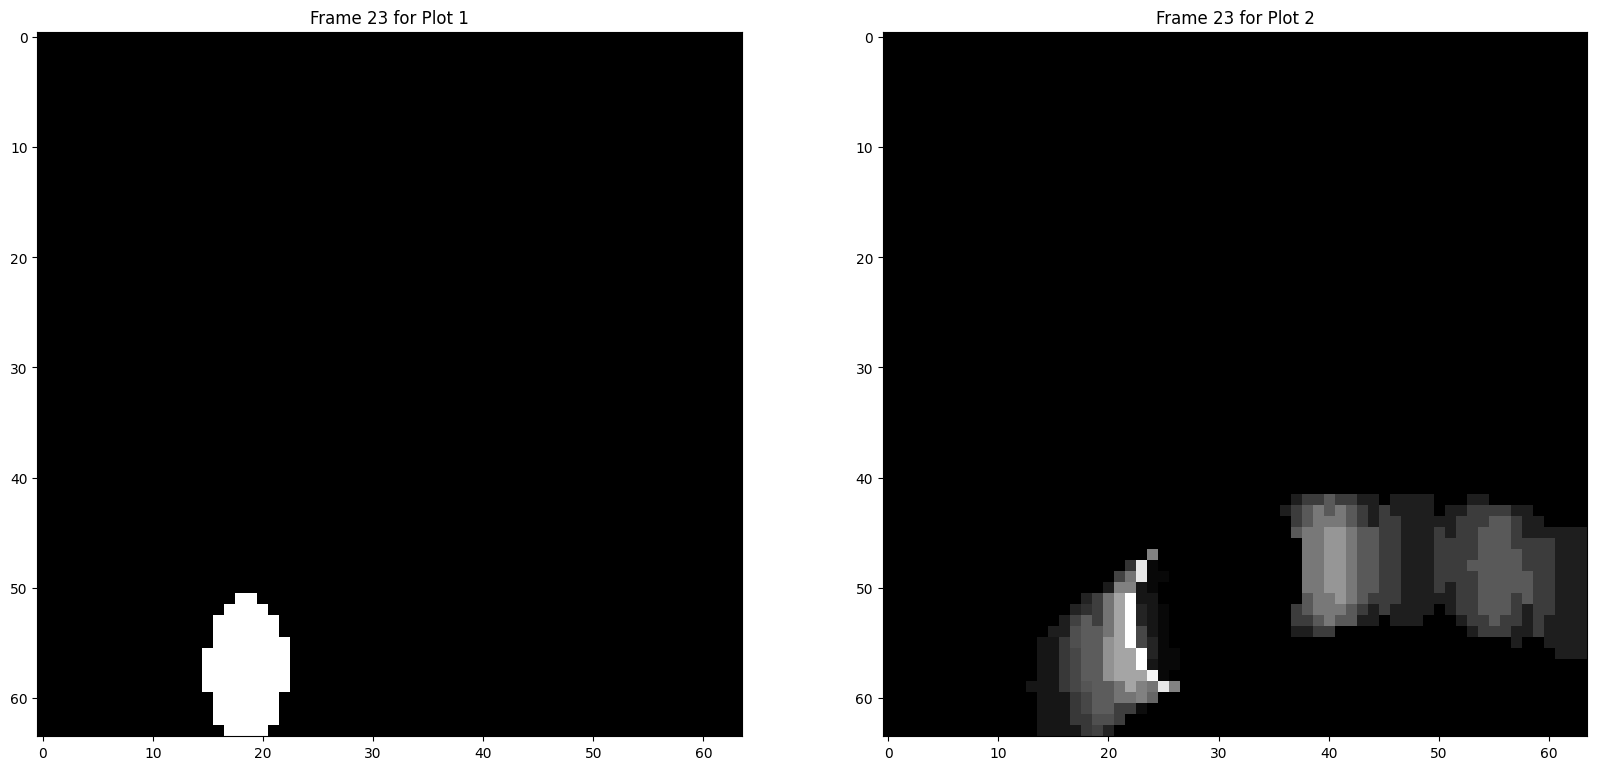

In [16]:
create_double_gif('./video_1/test_target/','_test_target.txt', './video_1/SimTestPred/', '_prediction.txt',  'testing.gif', 24)

MovieWriter ffmpeg unavailable; using Pillow instead.


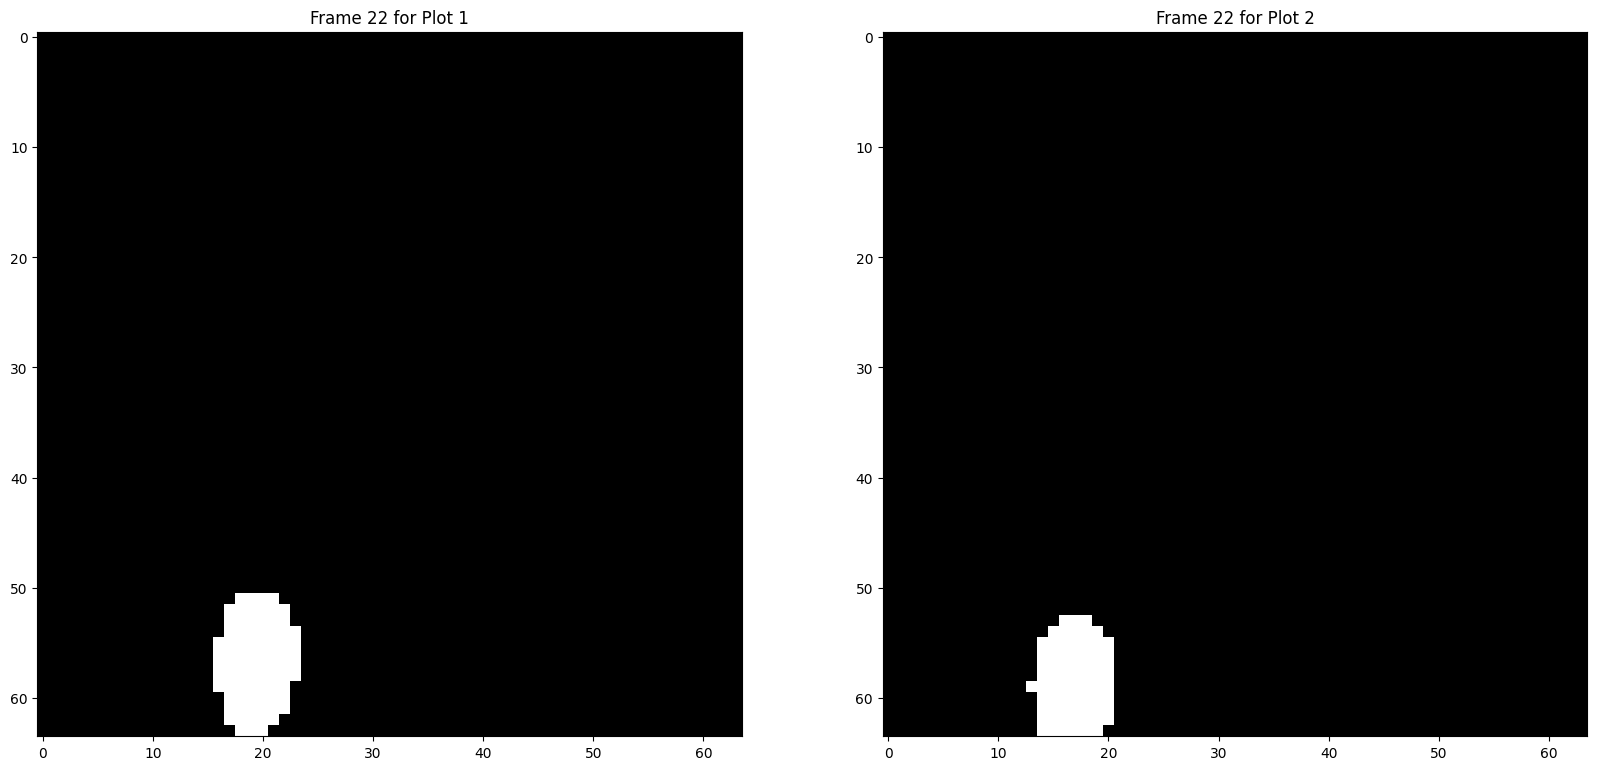

In [16]:
create_double_gif('./video_1/train_target/','_train_target.txt', './video_1/SimTestPred/', '_prediction.txt',  'testing.gif', 23)

In [51]:
targets = np.loadtxt("Training/targets.txt")
features = np.loadtxt("Training/features.txt")
print(targets.shape)


(25, 4096)


In [61]:
X = torch.Tensor(features)
X = X[:,1:]
Y = torch.Tensor(targets)

means = X.mean(0)
stds = X.std(0)
X_training_norm = (X-means)/stds

In [62]:
class SoftMaxRegressor(nn.Module):
    def __init__(self, in_features, out_classes):
        """Costruisce un regressore softmax.
        Input:
        in_features: numero di feature in input (es. 4)
        out_classes: numero di classi in uscita (es. 3)"""
        super(SoftMaxRegressor, self).__init__() #richiamo il costruttore della superclasse
        #questo passo è necessario per abilitare alcuni meccanismi automatici dei moduli di PyTorch
        self.linear = nn.Linear(in_features,out_classes) #il regressore softmax restituisce
        #distribuzioni di probabilità, quindi il numero di feature di output
        #coincide con il numero di classi
    def forward(self,x):
        """Definisce come processare l'input x"""
        scores = self.linear(x)
        return scores

In [64]:
model = SoftMaxRegressor(100,4096)
model(X_training_norm).sum(1)[0:10]
softmax = nn.Softmax(dim=1)#dim=1 specifica che effettueremo il softmax per righe
print(softmax(model(X_training_norm)).sum(1)[:10])

tensor([[0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0002, 0.0003],
        [0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0002, 0.0003],
        [0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0002, 0.0003],
        ...,
        [0.0002, 0.0003, 0.0003,  ..., 0.0002, 0.0001, 0.0004],
        [0.0003, 0.0003, 0.0002,  ..., 0.0001, 0.0002, 0.0002],
        [0.0003, 0.0003, 0.0003,  ..., 0.0002, 0.0002, 0.0004]],
       grad_fn=<SliceBackward0>)
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000], grad_fn=<SliceBackward0>)


In [65]:
preds_1 = softmax(model(X_training_norm)).max(1)[1]
preds_1

tensor([1523, 1523, 1523,   55, 3512, 1858,  951,  392,  511, 1557,  179, 1802,
        1457, 2394,  772,  742,  973, 3067,  390,  306, 1523, 1234, 1523, 2397,
        3329])

In [71]:
preds_1.shape

torch.Size([25])

In [69]:
print(accuracy_score(Y,preds_1))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [ ]:
lr = 0.01
epochs = 500

# Passo 1: normalizzazione dei dati
means = X.mean(0)

X_training_norm = (X-means)/stds

#Passo 2: inizializziamo il modello
regressor = LogisticRegressor(30)

loss = nn.BCELoss()
sgd = torch.optim.SGD(regressor.parameters(), lr)

for e in range(epochs):
    regressor.train()
    #Passo 3 & 4: calcoliamo le probabilità
    p = regressor(X_training_norm)
    #Passo 5: calcoliamo il valore della loss
    l = loss(p, Y.view(-1,1))
    #Passo 6: calcoliamo il gradiente della loss rispetto a tutti i parametri
    l.backward()
    #Passo 7: Aggiorniamo i pesi
    sgd.step()
    #azzeriamo i gradienti per evitare di accumularli
    sgd.zero_grad()
    #calcoliamo e facciamo log la loss di test:
    regressor.eval()